In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv', sep=',')
data['sumando'] = data[['<=39','40-49','50-59','60-69','70-79','80-89','>=90']].sum(axis=1)
data['Total_dia'] = '' 
data.head

<bound method NDFrame.head of     Grupo de edad  <=39  40-49  50-59  60-69  70-79  80-89  >=90  sumando  \
0      2020-04-09     2      1      1      9     21     19     4       57   
1      2020-04-10     2      2      2     10     22     21     6       65   
2      2020-04-11     3      2      2     12     24     24     6       73   
3      2020-04-12     3      2      3     12     28     25     7       80   
4      2020-04-13     3      2      3     12     29     26     7       82   
..            ...   ...    ...    ...    ...    ...    ...   ...      ...   
386    2021-04-30   629    964   2736   5496   7336   6701  2491    26353   
387    2021-05-01   632    971   2753   5520   7357   6724  2500    26457   
388    2021-05-02   635    979   2774   5541   7379   6747  2506    26561   
389    2021-05-03   641    985   2787   5565   7402   6765  2514    26659   
390    2021-05-04   643    987   2793   5571   7413   6774  2515    26696   

    Total_dia  
0              
1            

In [3]:
for i in range(len(data['Total_dia'])):
    if i == 0:
        data['Total_dia'][i] = data['sumando'][i]
    else:
        data['Total_dia'][i] = data['sumando'][i] - data['sumando'][i-1]

data.head

<bound method NDFrame.head of     Grupo de edad  <=39  40-49  50-59  60-69  70-79  80-89  >=90  sumando  \
0      2020-04-09     2      1      1      9     21     19     4       57   
1      2020-04-10     2      2      2     10     22     21     6       65   
2      2020-04-11     3      2      2     12     24     24     6       73   
3      2020-04-12     3      2      3     12     28     25     7       80   
4      2020-04-13     3      2      3     12     29     26     7       82   
..            ...   ...    ...    ...    ...    ...    ...   ...      ...   
386    2021-04-30   629    964   2736   5496   7336   6701  2491    26353   
387    2021-05-01   632    971   2753   5520   7357   6724  2500    26457   
388    2021-05-02   635    979   2774   5541   7379   6747  2506    26561   
389    2021-05-03   641    985   2787   5565   7402   6765  2514    26659   
390    2021-05-04   643    987   2793   5571   7413   6774  2515    26696   

    Total_dia  
0          57  
1           8

In [4]:
x = data['Total_dia']

muertes_covid_sem = []
contador = 0
suma = 0
for i in range(len(x)):
    suma += x[i]
    if contador == 6:
        muertes_covid_sem.append(suma)
        suma = 0
        contador = 0
    else:
        contador += 1

In [5]:
archivo = open('C:\\Users\\Javi\\Desktop\\DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv','r')
lector = csv.reader(archivo, delimiter=";")

muertes_tot = []
for fila in lector:
    if lector.line_num>455594:
        fecha = str(fila[1])
        muertes_tot.append(fecha)

In [6]:
muertes_tot_dia = []
suma = 0
fecha_act = muertes_tot[0]
for i in range(len(muertes_tot)):
    if muertes_tot[i] == fecha_act:
        suma += 1
    else:
        muertes_tot_dia.append(suma)
        suma = 0
        fecha_act = muertes_tot[i]

In [7]:
muertes_tot_sem = []
contador = 0
suma = 0
for i in range(len(muertes_tot_dia)):
    suma += muertes_tot_dia[i]
    if contador == 6:
        muertes_tot_sem.append(suma)
        suma = 0
        contador = 0
    else:
        contador += 1

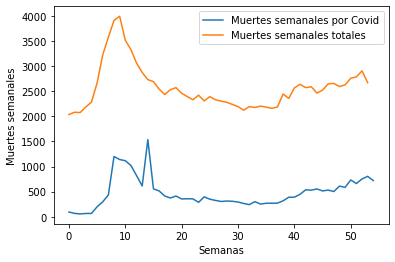

In [8]:
plt.plot(muertes_covid_sem,label='Muertes semanales por Covid')
plt.plot(muertes_tot_sem,label='Muertes semanales totales')
plt.xlabel('Semanas')  
plt.ylabel('Muertes semanales')  
plt.legend()
plt.show()

In [9]:
##Segundo Gráfico 
data_2 = pd.read_csv('C:\\Users\\Javi\\Desktop\\DEFUNCIONES INFLUENZA CONSULTA.csv', sep=';', encoding='latin-1', header=None)
muertes_inf_tot = data_2[[0,1]].copy()
muertes_inf_tot[1] = pd.to_datetime(muertes_inf_tot[1], format='%d-%m-%Y')
muertes_inf_tot = muertes_inf_tot.set_index(pd.DatetimeIndex(muertes_inf_tot[1]))
muertes_inf_tot = muertes_inf_tot.resample('W').count()

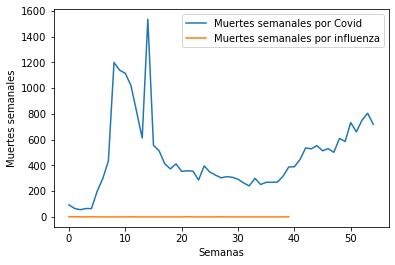

In [10]:
muertes_inf_sem = list(muertes_inf_tot[1])

plt.plot(muertes_covid_sem,label='Muertes semanales por Covid')
plt.plot(muertes_inf_sem,label='Muertes semanales por influenza')
plt.xlabel('Semanas')  
plt.ylabel('Muertes semanales')  
plt.legend()
plt.show()

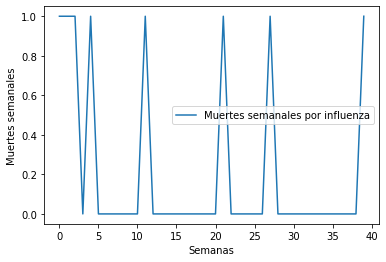

In [11]:
##Gráfico muertes semanales por influenza en 2020
plt.plot(muertes_inf_sem,label='Muertes semanales por influenza')
plt.xlabel('Semanas')  
plt.ylabel('Muertes semanales')  
plt.legend()
plt.show()

In [12]:
#Si bien, el Covid-19 y la gripe común poseen algunas similitudes en relación a sus síntomas y formas de contagio, 
#se puede decir que estas no son comparables en cuanto a sus impactos. Luego de observar los gráficos, se puede afirmar 
#que el coronavirus SARS-coV-2 no es como la gripe, contando con una tasa de letalidad considerablemente mayor. El número 
#de muertes semanales por Covid-19 representa un porcentaje no menor de las muertes totales en Chile, mientras que las muertes
#por influenza son muy bajas en relación a estas últimas -con mayor diferencia el 2020 -. Incluso se puede ver como la línea de
#tendencia de las muertes totales sigue la tendencia de las muertes por Covid.

#También es importante destacar que el periodo de incubación en el caso de Covid es más largo que el de una gripe, lo que, 
#sumado a la existencia de un gran número de casos asintomáticos, facilita la propagación del virus. 
